# Collaborative Filtering Recommender 

following this : https://beckernick.github.io/matrix-factorization-recommender/

In [1]:
# import Libraries
import pandas as pd
import numpy as np

Loading Rating Dataset

In [2]:
cols= ["user_id", "item_id", "rating", "timestamp"]

In [3]:
ratings_df = pd.read_csv('u.data',sep='\t',names=cols)

In [4]:
ratings_df.sample(8)

,user_id,item_id,rating,timestamp
65886,867,68,4,880079020
97976,606,393,4,880925453
26207,216,58,4,880244972
15835,293,1217,1,888907913
37968,361,86,4,879440941
89205,592,813,4,882607955
7508,327,144,4,887820293
49975,354,487,3,891217298


Creating User-Item Rating Matrix

In [5]:
Rating_Matrix_orig = ratings_df.pivot(index = 'user_id', columns ='item_id', values = 'rating')
Rating_Matrix_orig.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,4.0,NaN,NaN,3.0,NaN,NaN,4.0,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,4.0,NaN,3.0,2.0,4.0,NaN,4.0,4.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# filling nan values with zeros 
Rating_Matrix = Rating_Matrix_orig.fillna(0)
Rating_Matrix.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,3.0,3.0,5.0,4.0,0.0,0.0,4.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,2.0,0.0,2.0,2.0,0.0,2.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,4.0,3.0,1.0,4.0,3.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,4.0,4.0,0.0,3.0,0.0,0.0,4.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# DataFrame to numpy array or matrix
RM_orig= Rating_Matrix_orig.values
RM = Rating_Matrix.values

In [8]:
# finding Mean to remove skewness

# Calculating mean Using only original values, skipping null values
# user_ratings_mean = np.nanmean(RM_orig, axis = 1)

# Using 0 instead of nan to calculate mean
user_ratings_mean = np.mean(RM, axis = 1)

RM_demeaned = RM - user_ratings_mean.reshape(-1, 1)

Decomposing values using SVD

In [9]:
from scipy.sparse.linalg import svds

In [10]:
# 50 latent factors
U, sigma, Vt = svds(RM_demeaned, k = 50)

# SVDS on skewed data
U_sk, sigma_sk, Vt_sk = svds(RM, k = 50)
sigma_sk = np.diag(sigma_sk)

In [11]:
sigma = np.diag(sigma)
sigma.shape

(50, 50)

Predicting rating based on latent feature matrices and their weights 

In [12]:
# for normalized data
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
# numpy array to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = Rating_Matrix.columns)


# Skewed data
all_user_predicted_ratings_sk = np.dot(np.dot(U_sk, sigma_sk), Vt_sk)
# numpy array to dataframe
preds_sk_df = pd.DataFrame(all_user_predicted_ratings_sk, columns = Rating_Matrix.columns)

In [13]:
def filter_rating(input_matrix):
    for i in range(len(input_matrix)):
        for j in range(len(input_matrix[i])):
            if input_matrix[i][j]<1:
                input_matrix[i][j]=1
            if input_matrix[i][j]>5:
                input_matrix[i][j]=5
            input_matrix[i][j]=int(input_matrix[i][j])
    return input_matrix

Calculating Error

In [14]:
# Function to find error only for items that we originally rated
def cal_matrix_rmse(pred,orig):
    total_error_sum=0
    total_error_num=0
    rmse = 0
    for i in range(len(pred)):
        for j in range(len(pred[i])):
            if orig[i][j]>0:
                total_error_num+=1
                total_error_sum+=(pred[i][j]-orig[i][j])**2
    if total_error_num>0:
        rmse = np.sqrt(total_error_sum/total_error_num)
    return rmse

In [15]:
# For normalized data
cal_matrix_rmse(all_user_predicted_ratings,RM)

1.8532981949601184

In [16]:
# For skewed data
cal_matrix_rmse(all_user_predicted_ratings_sk,RM)

1.855660398959854

## Extra Work 

In [17]:
def find_k(Orig_matrix,k_max=150,k_min=10):
    k_stat=[]
    user_ratings_mean = np.nanmean(Orig_matrix, axis = 1)
    RM_demeaned = Orig_matrix - user_ratings_mean.reshape(-1, 1)
    for k in range(k_min,k_max+1):
        U_k, sigma_k, Vt_k = svds(RM_demeaned, k=k)
        sigma_k = np.diag(sigma_k)
        m1= np.dot(U_k, sigma_k)
        all_user_predicted_ratings = np.dot(m1, Vt_k) + user_ratings_mean.reshape(-1, 1)
        
        rmse=cal_matrix_rmse(all_user_predicted_ratings,Orig_matrix)
        print(k,rmse)
        k_stat.append([k,rmse])
        del U_k, sigma_k, Vt_k
    return k_stat

In [18]:
stats= find_k(RM)

10 2.2727651196442586
11 2.254692833423006
12 2.2372063679620937
13 2.220774557561892
14 2.206124253865148
15 2.192062768463186
16 2.1785312389483873
17 2.165516301226192
18 2.1530960170503906
19 2.140524398024512
20 2.128501668548124
21 2.11723364994174
22 2.1064959193718145
23 2.095629886414788
24 2.0853679455007748
25 2.0751023729758566
26 2.0649591923159654
27 2.055170770240966
28 2.0455992491106536
29 2.0362034782159846
30 2.0263255377203513
31 2.016547063646835
32 2.007012358054803
33 1.9979093205196667
34 1.9885637757363093
35 1.9797615117857887
36 1.9705647276597544
37 1.9613665760460355
38 1.952567772826452
39 1.943848836504259
40 1.935262136380132
41 1.9268224133934673
42 1.9181001725548847
43 1.9098648121057802
44 1.9016813077006178
45 1.8932324942409149
46 1.8854471826459287
47 1.877423809986904
48 1.869475819982377
49 1.8611711426585371
50 1.853298194960118
51 1.8453426304958853
52 1.8374966829610908
53 1.8296830580461745
54 1.8221507892063515
55 1.8144806364664232
56 1.80

In [19]:
Stat_2 = find_k(RM,300,150)

150 1.2383413977336661
151 1.2333637088933458
152 1.2284493800399634
153 1.2236321709456994
154 1.2187980580487416
155 1.2139842241001915
156 1.2091276276521348
157 1.2043210806283406
158 1.1994252304806716
159 1.1946868904516292
160 1.1901164429553535
161 1.1856635014037271
162 1.1810974394222633
163 1.17633899214223
164 1.1717329845320459
165 1.1670706932067372
166 1.1623680331688908
167 1.1578416551062787
168 1.153142403761253
169 1.1485211096606012
170 1.1438055092113122
171 1.139159898530851
172 1.1346423719670713
173 1.130313104998956
174 1.125957790212867
175 1.1214086895250053
176 1.1171102585564407
177 1.112697157197566
178 1.1083757745503677
179 1.1038478286360411
180 1.099556309812408
181 1.09516146436297
182 1.0906437800944047
183 1.0862605657874858
184 1.0821339851553
185 1.0777986206801995
186 1.0735166214220344
187 1.069283230233743
188 1.0648517661593737
189 1.060571726119774
190 1.056105234424203
191 1.051834986960521
192 1.047640505793252
193 1.0432310296293814
194 1.

In [20]:
all_stat=np.concatenate((stats,Stat_2), axis=0)


In [21]:
all_stat.reshape(-1,2)
all_stat

array([[ 10.        ,   2.27276512],
       [ 11.        ,   2.25469283],
       [ 12.        ,   2.23720637],
       [ 13.        ,   2.22077456],
       [ 14.        ,   2.20612425],
       [ 15.        ,   2.19206277],
       [ 16.        ,   2.17853124],
       [ 17.        ,   2.1655163 ],
       [ 18.        ,   2.15309602],
       [ 19.        ,   2.1405244 ],
       [ 20.        ,   2.12850167],
       [ 21.        ,   2.11723365],
       [ 22.        ,   2.10649592],
       [ 23.        ,   2.09562989],
       [ 24.        ,   2.08536795],
       [ 25.        ,   2.07510237],
       [ 26.        ,   2.06495919],
       [ 27.        ,   2.05517077],
       [ 28.        ,   2.04559925],
       [ 29.        ,   2.03620348],
       [ 30.        ,   2.02632554],
       [ 31.        ,   2.01654706],
       [ 32.        ,   2.00701236],
       [ 33.        ,   1.99790932],
       [ 34.        ,   1.98856378],
       [ 35.        ,   1.97976151],
       [ 36.        ,   1.97056473],
 

In [22]:
from matplotlib import pyplot as plt

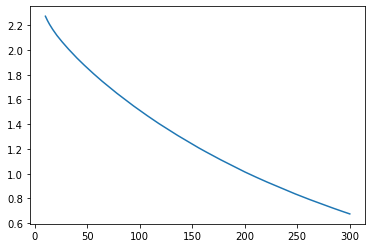

In [23]:
plt.plot(all_stat[:,0],all_stat[:,1])
plt.show()

In [24]:
preds_df.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
920,3.070319,0.375771,0.215856,-0.414857,0.068810,-0.397165,0.175624,2.232035,-0.551309,0.126419,...,0.012590,0.054323,-0.026538,-0.021200,-0.003606,-0.010804,-0.011364,-0.011084,0.024845,-0.023643
67,1.972127,-0.173152,0.332316,-0.335059,0.057504,0.109606,1.832255,-0.347029,2.784305,-0.170372,...,0.001068,-0.027890,-0.008161,-0.005622,-0.003235,-0.002007,-0.004932,-0.003470,0.013409,-0.010795
508,0.404329,-0.326945,-0.097644,-0.009400,-0.031171,-0.130372,0.541192,0.247120,-0.124085,-0.090474,...,-0.015022,-0.007708,-0.007659,-0.007337,-0.003978,-0.000109,0.013054,0.006473,0.020783,-0.023245
412,2.290714,-0.254704,0.031712,-0.327850,0.102716,0.311042,1.747618,-0.371293,3.696189,0.617032,...,-0.039806,-0.049409,-0.039518,-0.032263,-0.012562,-0.016953,-0.015355,-0.016154,0.004879,-0.030940
75,0.196023,0.314993,0.372568,1.050804,0.108089,0.956914,3.394253,-0.780408,2.107241,0.209113,...,0.063566,-0.005649,0.059439,0.054007,0.068232,0.041755,0.038981,0.040368,0.005168,0.062027
117,-1.425258,-0.148359,0.895347,0.314221,1.369848,0.078939,4.285773,0.701212,0.699209,-0.020446,...,0.010493,-0.002338,-0.037814,-0.029476,0.031981,-0.017769,-0.027708,-0.022738,-0.020044,0.011577
644,0.926771,0.421412,0.257040,2.063649,0.036236,0.593510,0.533593,-0.800941,0.320731,0.508210,...,0.021887,-0.060396,-0.011165,-0.010849,0.000494,-0.009022,-0.006635,-0.007829,-0.049613,0.029264
308,0.065461,-0.091048,0.054494,-0.136627,-0.074003,0.147251,0.039656,0.006490,0.611476,0.059770,...,0.000423,-0.010262,0.010525,0.010018,0.011119,0.014066,0.024190,0.019128,0.020031,0.003954


In [25]:
preds_sk_df.sample(8)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
434,5.736648,3.427022,2.252878,3.085933,1.800067,0.393095,6.006654,2.019663,1.771685,3.486784,...,0.019123,-0.011895,0.028141,0.018761,-0.015640,0.002281,0.006842,0.004561,0.080023,0.071172
108,3.441650,2.194246,0.825219,2.794773,2.026720,-0.175430,3.876655,2.808567,2.193123,-0.771760,...,-0.007428,0.074693,-0.051998,-0.034666,0.062239,-0.002516,-0.007548,-0.005032,0.033761,0.037957
426,0.431895,-0.143284,-0.010778,-0.106146,-0.097720,0.088733,-0.146707,-0.228224,0.665269,0.258280,...,-0.028565,-0.009005,0.005252,0.003502,-0.002201,0.008741,0.026224,0.017483,-0.008846,0.015812
160,0.682103,0.031900,0.257189,0.301719,0.249836,0.100868,-0.044802,0.257296,1.262885,-0.324681,...,0.026819,0.015667,0.027126,0.018084,-0.018550,0.000935,0.002805,0.001870,-0.009307,0.004417
460,0.499014,-0.067923,-0.155492,0.127666,0.042562,0.121490,0.561738,0.528378,1.163580,0.086453,...,-0.003440,-0.004411,-0.008052,-0.005368,-0.004132,0.003787,0.011360,0.007574,0.009314,-0.019792
647,3.687943,3.596899,0.396951,2.080217,1.794172,0.005898,3.526618,3.312056,0.226219,0.882578,...,-0.002327,-0.003821,0.039027,0.026018,0.007033,-0.000574,-0.001723,-0.001148,-0.024749,-0.059764
667,0.827869,-0.157440,0.152279,0.399135,-0.147722,0.053635,0.628389,0.315647,-0.171199,0.080910,...,-0.010726,0.014621,0.000832,0.000555,-0.013144,0.008309,0.024927,0.016618,-0.001892,-0.027042
217,-0.029829,-0.167684,-0.085262,1.723251,0.667353,-0.192085,1.179502,2.005090,0.062341,0.347122,...,-0.002452,0.023790,-0.021323,-0.014216,0.032537,-0.001547,-0.004640,-0.003094,0.018463,-0.002021


### Finding Optimum number of Latent features

In [26]:
def find_best_k(Orig_matrix,krange=[50]):
    k_stat=[]
    user_ratings_mean = np.nanmean(Orig_matrix, axis = 1)
    RM_demeaned = Orig_matrix - user_ratings_mean.reshape(-1, 1)
    for k in krange:
        U_k, sigma_k, Vt_k = svds(RM_demeaned, k=k)
        sigma_k = np.diag(sigma_k)
        m1= np.dot(U_k, sigma_k)
        all_user_predicted_ratings = np.dot(m1, Vt_k) + user_ratings_mean.reshape(-1, 1)
        
        rmse=cal_matrix_rmse(all_user_predicted_ratings,Orig_matrix)
        print(k,rmse)
        k_stat.append([k,rmse])
        del U_k, sigma_k, Vt_k
    return k_stat

In [27]:
K_range=[20,30,40,50]
best_k_stat=np.array(find_best_k(RM,K_range))

20 2.128501668548124
30 2.0263255377203513
40 1.9352621363801326
50 1.8532981949601184


Plotting a graph of error vs number of features

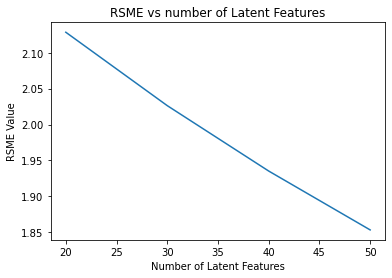

In [28]:
from matplotlib import pyplot as plt

plt.plot(best_k_stat[:,0],best_k_stat[:,1])
plt.xlabel("Number of Latent Features")
plt.ylabel("RSME Value")
plt.title("RSME vs number of Latent Features")
plt.show()

## Recomending movies from Predicted rating

In [29]:
# loading dataset
movies_data_df = pd.read_csv('u.item',sep='\|',names=['item_id', 'movie title', 'release_date', 'video_release_date',
         'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
         "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western'],engine='python')



In [30]:
# Keeping only movieID and title
movies_df= movies_data_df[['item_id','movie title']]
movies_df.sample(8)

,item_id,movie title
1163,1164,Zeus and Roxanne (1997)
194,195,"Terminator, The (1984)"
253,254,Batman & Robin (1997)
59,60,Three Colors: Blue (1993)
509,510,"Magnificent Seven, The (1954)"
1212,1213,Guilty as Sin (1993)
56,57,Priest (1994)
1244,1245,Gridlock'd (1997)


In [31]:
# Function to generate list of movies
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'item_id', right_on = 'item_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['item_id'].isin(user_full['item_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'item_id',
               right_on = 'item_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations


Enter UserID and Number of recommendations needed

In [32]:
uid=837
number_of_recommendation= 10 

In [33]:
already_rated, predictions = recommend_movies(preds_df, uid, movies_df, ratings_df, number_of_recommendation)

User 837 has already rated 46 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [34]:
# list of movies rated by User
already_rated.head(10)

,user_id,item_id,rating,timestamp,movie title
44,837,740,5,875722123,Jane Eyre (1996)
37,837,1009,5,875721765,Stealing Beauty (1996)
9,837,283,5,875722069,Emma (1996)
36,837,125,5,875722032,Phenomenon (1996)
11,837,289,5,875721539,Evita (1996)
24,837,151,5,875721734,Willy Wonka and the Chocolate Factory (1971)
23,837,258,4,875721473,Contact (1997)
14,837,20,4,875721919,Angels and Insects (1995)
22,837,294,4,875721502,Liar Liar (1997)
27,837,328,4,875721604,Conspiracy Theory (1997)


In [35]:
# list of recommended movies
predictions

,item_id,movie title
11,14,"Postino, Il (1994)"
0,1,Toy Story (1995)
107,116,Cold Comfort Farm (1995)
116,126,"Spitfire Grill, The (1996)"
42,50,Star Wars (1977)
238,255,My Best Friend's Wedding (1997)
440,471,Courage Under Fire (1996)
92,100,Fargo (1996)
258,282,"Time to Kill, A (1996)"
704,742,Ransom (1996)


In [36]:
already_rated_20, predictions_20 = recommend_movies(preds_df, uid, movies_df, ratings_df, 20)
predictions_20

User 837 has already rated 46 movies.
Recommending the highest 20 predicted ratings movies not already rated.


,item_id,movie title
11,14,"Postino, Il (1994)"
0,1,Toy Story (1995)
107,116,Cold Comfort Farm (1995)
116,126,"Spitfire Grill, The (1996)"
42,50,Star Wars (1977)
238,255,My Best Friend's Wedding (1997)
440,471,Courage Under Fire (1996)
92,100,Fargo (1996)
258,282,"Time to Kill, A (1996)"
704,742,Ransom (1996)


Calculating Error Metrics

In [37]:
all_user_predicted_ratings_filtered = filter_rating(all_user_predicted_ratings)

In [38]:
predict_rated, original_rated =[],[]
for i in range(len(all_user_predicted_ratings_filtered)):
        for j in range(len(all_user_predicted_ratings_filtered[i])):
            if RM[i][j]>0:
                original_rated.append(RM[i][j])                
                predict_rated.append(all_user_predicted_ratings_filtered[i][j])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

def get_metrics(y_test, y_pred):
    
    mae_value = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse_value = np.sqrt(mse) #mse**(0.5) 

    print('Micro Precision of the selected model: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall of the selected model: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score of the selected model: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('\nRMSE loss of the selected model: ', round(rmse_value, 3))
    print('\nMAE loss of the selected model: ', round(mae_value, 3))
    
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']))


In [40]:
get_metrics(original_rated,predict_rated)

Micro Precision of the selected model: 0.16
Micro Recall of the selected model: 0.16
Micro F1-score of the selected model: 0.16


RMSE loss of the selected model:  2.019

MAE loss of the selected model:  1.69

Classification Report

              precision    recall  f1-score   support

    Rating 1       0.11      0.92      0.20      6110
    Rating 2       0.08      0.16      0.10     11370
    Rating 3       0.19      0.11      0.14     27145
    Rating 4       0.40      0.09      0.14     34174
    Rating 5       0.75      0.11      0.19     21201

    accuracy                           0.16    100000
   macro avg       0.30      0.28      0.15    100000
weighted avg       0.36      0.16      0.15    100000



## Calculating error metrics for top 10 and 20 recommended movies

In [41]:
top_10 =pd.DataFrame( columns=["user_id","rmse","mae","precision","recall","f1"])
top_20 =pd.DataFrame( columns=["user_id","rmse","mae","precision","recall","f1"])

In [42]:
top_20

,user_id,rmse,mae,precision,recall,f1


In [99]:
# Calculate metric error for Top 10 items
top_10 =pd.DataFrame( columns=["user_id","rmse","mae","precision","recall","f1"])

from sklearn.metrics import mean_squared_error, mean_absolute_error


for i in range(len(all_user_predicted_ratings_filtered)): # for each user
    or_rated,pr_rated=[],[]
    index_loc_pr =all_user_predicted_ratings_filtered[i].argsort()[-10:][::-1] # index of top 10 predicted rated
#     index_loc_or =RM[i].argsort()[-10:][::-1] # index of top original rated

    for item in index_loc_pr: # taking each index of recommended 
        if RM[i][item]>0:    # only item rated by original user        
            or_rated.append(int(RM[i][item])) # adding original rating to list
            pr_rated.append(int(all_user_predicted_ratings_filtered[i][item])) # adding predicted rating 

    if len(or_rated)==0:
        rmse=0
        mae=0
        recall=0
        precision=0
        f1=0
    else:
        mae = mean_absolute_error(or_rated, pr_rated) 
        mse = mean_squared_error(or_rated, pr_rated)
        rmse = np.sqrt(mse)
        
        total_true = 0  
        marked_true = 0
        for j in range(len(RM[i])): # for index of every movie
            if RM[i][j]>0: # if rated by user
                total_true+=1 # total positive
                if j in index_loc_pr: # if index value is in recommended list
                    marked_true+=1 # true positive from model
        recall=marked_true/10
        if total_true>0:
            precision=marked_true/total_true
        else:
            precision=0
        if precision+recall==0:
            f1=0
        else:
            f1=2*(recall * precision) / (recall + precision)
        
    top_10 = top_10.append({'user_id':i+1,'rmse':rmse,'mae':mae,'precision':precision,'recall':recall,'f1':f1 },ignore_index=True)

In [102]:
# Calculate metric error for Top 20 items
top_20 =pd.DataFrame( columns=["user_id","rmse","mae","precision","recall","f1"])

from sklearn.metrics import mean_squared_error, mean_absolute_error


for i in range(len(all_user_predicted_ratings_filtered)):
    or_rated,pr_rated=[],[]
    index_loc_pr =all_user_predicted_ratings_filtered[i].argsort()[-20:][::-1] # index of top predicted rated
#     index_loc_or =RM[i].argsort()[-20:][::-1] # index of top original rated
    for item in index_loc_pr:
        if RM[i][item]>0:    # only item rated by original user        
            or_rated.append(int(RM[i][item]))
            pr_rated.append(int(all_user_predicted_ratings_filtered[i][item]))

    if len(or_rated)==0:
        rmse=0
        mae=0
        recall=0
        precision=0
        f1=0
    else:
        mae = mean_absolute_error(or_rated, pr_rated)
        mse = mean_squared_error(or_rated, pr_rated)
        rmse = np.sqrt(mse)
        
        total_true = 0
        marked_true = 0
        for j in range(len(RM[i])):
            if RM[i][j]>0:
                total_true+=1
                if j in index_loc_pr:
                    marked_true+=1
        recall=marked_true/20
        if total_true>0:
            precision=marked_true/total_true
        else:
            precision=0
        if precision+recall==0:
            f1=0
        else:
            f1=2*(recall * precision) / (recall + precision)
        
    top_20 = top_20.append({'user_id':i+1,'rmse':rmse,'mae':mae,'precision':precision,'recall':recall,'f1':f1 },ignore_index=True)

In [100]:
top_10

,user_id,rmse,mae,precision,recall,f1
0,1.0,0.316228,0.100000,0.036765,1.0,0.070922
1,2.0,1.183216,1.000000,0.161290,1.0,0.277778
2,3.0,1.581139,1.100000,0.185185,1.0,0.312500
3,4.0,2.160247,2.000000,0.250000,0.6,0.352941
4,5.0,1.095445,0.800000,0.057143,1.0,0.108108
...,...,...,...,...,...,...
938,939.0,1.825742,1.777778,0.183673,0.9,0.305085
939,940.0,1.048809,0.900000,0.093458,1.0,0.170940
940,941.0,2.207940,2.125000,0.363636,0.8,0.500000
941,942.0,1.699673,1.555556,0.113924,0.9,0.202247


In [101]:
# Printing metrics top 10
print('RMSE mean: {}'.format(round(top_10.rmse.mean(), 3)))
print('MAE mean: {}'.format(round(top_10.mae.mean(), 3)))
print('Recall mean: {}'.format(round(top_10.recall.mean(), 3)))
print('Precision mean: {}'.format(round(top_10.precision.mean(), 3)))
print('F1 score mean: {}'.format(round(top_10.f1.mean(), 3)))

RMSE mean: 1.289
MAE mean: 1.099
Recall mean: 0.862
Precision mean: 0.143
F1 score mean: 0.229


In [103]:
top_20

,user_id,rmse,mae,precision,recall,f1
0,1.0,0.670820,0.450000,0.073529,1.00,0.136986
1,2.0,1.685854,1.473684,0.306452,0.95,0.463415
2,3.0,1.507557,1.000000,0.203704,0.55,0.297297
3,4.0,2.160247,2.000000,0.250000,0.30,0.272727
4,5.0,1.378405,1.100000,0.114286,1.00,0.205128
...,...,...,...,...,...,...
938,939.0,2.277608,2.187500,0.326531,0.80,0.463768
939,940.0,1.048809,0.900000,0.186916,1.00,0.314961
940,941.0,2.207940,2.125000,0.363636,0.40,0.380952
941,942.0,2.100420,1.941176,0.215190,0.85,0.343434


In [104]:
# Printing metrics top 20
print('RMSE mean: {}'.format(round(top_20.rmse.mean(), 3)))
print('MAE mean: {}'.format(round(top_20.mae.mean(), 3)))
print('Recall mean: {}'.format(round(top_20.recall.mean(), 3)))
print('Precision mean: {}'.format(round(top_20.precision.mean(), 3)))
print('F1 score mean: {}'.format(round(top_20.f1.mean(), 3)))

RMSE mean: 1.435
MAE mean: 1.238
Recall mean: 0.739
Precision mean: 0.209
F1 score mean: 0.295
